In [70]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Build model using LinearRegression

In [71]:
cars = pd.read_csv("final_cars.csv")

In [72]:
cars.columns

Index(['make', 'fuel-type', 'num-of-doors', 'body-style', 'drive-wheels',
       'curb-weight', 'engine-size', 'highway-mpg', 'price'],
      dtype='object')

In [73]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [74]:
X.sample(5)

,make,fuel-type,num-of-doors,body-style,drive-wheels,curb-weight,engine-size,highway-mpg
162,toyota,gas,two,hatchback,rwd,2300,98,29
18,chevrolet,gas,two,hatchback,fwd,1874,90,43
89,nissan,gas,four,sedan,fwd,1938,97,37
153,toyota,gas,four,hatchback,fwd,2109,98,37
77,mitsubishi,gas,two,hatchback,fwd,2370,110,30


In [75]:
X  = pd.get_dummies(X)

In [76]:
X.shape,y.shape

((201, 37), (201,))

In [77]:
X.columns

Index(['curb-weight', 'engine-size', 'highway-mpg', 'make_alfa-romero',
       'make_audi', 'make_bmw', 'make_chevrolet', 'make_dodge', 'make_honda',
       'make_isuzu', 'make_jaguar', 'make_mazda', 'make_mercedes-benz',
       'make_mercury', 'make_mitsubishi', 'make_nissan', 'make_peugot',
       'make_plymouth', 'make_porsche', 'make_renault', 'make_saab',
       'make_subaru', 'make_toyota', 'make_volkswagen', 'make_volvo',
       'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [81]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [82]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]:.0f}")

curb-weight               6
engine-size               36
highway-mpg               -61
make_alfa-romero          -2153
make_audi                 2658
make_bmw                  7931
make_chevrolet            -121
make_dodge                -2116
make_honda                -1250
make_isuzu                -6058
make_jaguar               6193
make_mazda                -1128
make_mercedes-benz        6816
make_mercury              -1083
make_mitsubishi           -2902
make_nissan               -1874
make_peugot               -3491
make_plymouth             -2727
make_porsche              11762
make_renault              -3278
make_saab                 -340
make_subaru               -2340
make_toyota               -2902
make_volkswagen           -1492
make_volvo                -105
fuel-type_diesel          -15
fuel-type_gas             15
num-of-doors_four         33
num-of-doors_two          -33
body-style_convertible    2856
body-style_hardtop        -1070
body-style_hatchback      -133
body

In [83]:
model.intercept_

-4462.332309511436

### Calculate accuracy with train data

In [84]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [85]:
y_pred = model.predict(X_train)
print("MSE  : ", mean_squared_error(y_train,y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_train,y_pred)))

MSE  :  3914467.983918011
RMSE :  1978.5014490563335


In [86]:
r2score = r2_score(y_train,y_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.93


### Test with test data

In [87]:
y_pred = model.predict(X_test)

In [88]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6367777.45
Root Mean Squared Error : 2523.45
R2 Score: 0.93


<AxesSubplot:ylabel='price'>

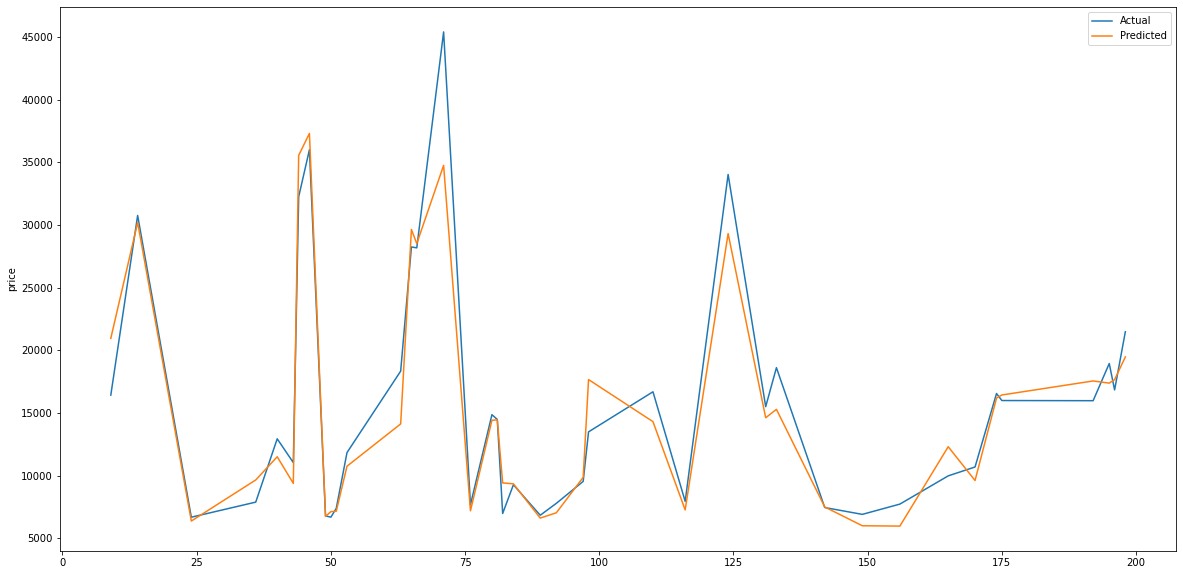

In [89]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

In [90]:
for p,a in zip(y_pred[:10],y_test[:10]):
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f}")

 34753  -   45400 - -10647
  6386  -    6692 -   -306
  7168  -    7395 -   -227
 16194  -   16558 -   -364
  9871  -    9549 -    322
 11514  -   12945 -  -1431
 29318  -   34028 -  -4710
  9356  -    9279 -     77
  7508  -    7463 -     45
 14624  -   15510 -   -886


In [91]:
# Display % of difference 
for p,a in zip(y_pred[:10],y_test[:10]):
    d = p - a
    print(f"{p:6.0f}  -  {a:6.0f} - {p - a:6.0f} - {abs(d / a * 100):5.2f}")

 34753  -   45400 - -10647 - 23.45
  6386  -    6692 -   -306 -  4.57
  7168  -    7395 -   -227 -  3.07
 16194  -   16558 -   -364 -  2.20
  9871  -    9549 -    322 -  3.37
 11514  -   12945 -  -1431 - 11.06
 29318  -   34028 -  -4710 - 13.84
  9356  -    9279 -     77 -  0.83
  7508  -    7463 -     45 -  0.60
 14624  -   15510 -   -886 -  5.71


## Model with Standardization 

In [92]:
cars = pd.read_csv("final_cars.csv")

In [93]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [94]:
X = pd.get_dummies(X)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [97]:
## Scale X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
X_train = pd.DataFrame(X_train_scaled,columns = X.columns)

In [99]:
X_test = pd.DataFrame(X_test_scaled,columns = X.columns)

In [100]:
X_test.head()

,curb-weight,engine-size,highway-mpg,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,...,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,2.413275,4.982797,-2.238975,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,-1.148408,1.148408,-0.197386,5.567764,-0.733799,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
1,-1.071322,-0.923353,1.017716,-0.138233,-0.197386,-0.197386,-0.138233,4.358899,-0.271708,-0.079305,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
2,-1.150058,-0.895755,1.017716,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799
3,0.921319,1.312152,-1.054724,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,-1.148408,1.148408,-0.197386,-0.179605,1.362770,-0.916013,-0.377964,-0.229416,-1.224745,1.362770
4,-0.439410,-0.095388,0.425590,-0.138233,-0.197386,-0.197386,-0.138233,-0.229416,-0.271708,-0.079305,...,0.870771,-0.870771,-0.197386,-0.179605,-0.733799,1.091687,-0.377964,-0.229416,0.816497,-0.733799


In [101]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [102]:
y_pred = model.predict(X_test)

In [103]:
## get MSE 
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f"Root Mean Squared Error : {rmse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 6364593.06
Root Mean Squared Error : 2522.81
Mean Absolute Error : 1636.91
R2 Score: 0.93


### Micro model with 2 features 

In [104]:
# Micro model
X_micro =  X[['engine-size','highway-mpg']]
y_micro =  y

In [105]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [106]:
micro_model = LinearRegression()
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression()

In [107]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7796926906820936

In [108]:
y_micro_pred = micro_model.predict(X_micro_test)

In [109]:
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

mse = mean_squared_error(y_micro_test,y_micro_pred)
print(f"Mean Squared Error : {mse:0.2f}")

rmse = np.sqrt(mse)
print(f"Root Mean Squared Error : {rmse:0.2f}")

R2 Score: 0.79
Mean Squared Error : 15885068.97
Root Mean Squared Error : 3985.61


## RandomForestRegressor 

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [112]:
model = RandomForestRegressor(n_estimators=50)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')

Train score : 0.9863682863864704


In [113]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.93


In [114]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  5889370.626351761
RMSE :  2426.8025519913567


In [115]:
for f,v in sorted(zip (X_train.columns, model.feature_importances_),key = lambda t : t[1], reverse = True):
      print(f"{f:30} {v:0.2f}")

engine-size                    0.61
curb-weight                    0.27
highway-mpg                    0.06
make_bmw                       0.02
make_audi                      0.00
fuel-type_gas                  0.00
fuel-type_diesel               0.00
make_volvo                     0.00
body-style_sedan               0.00
make_porsche                   0.00
drive-wheels_rwd               0.00
body-style_convertible         0.00
body-style_wagon               0.00
make_peugot                    0.00
drive-wheels_fwd               0.00
body-style_hatchback           0.00
num-of-doors_four              0.00
body-style_hardtop             0.00
make_toyota                    0.00
make_volkswagen                0.00
drive-wheels_4wd               0.00
num-of-doors_two               0.00
make_alfa-romero               0.00
make_dodge                     0.00
make_plymouth                  0.00
make_mazda                     0.00
make_mitsubishi                0.00
make_isuzu                  

<AxesSubplot:ylabel='price'>

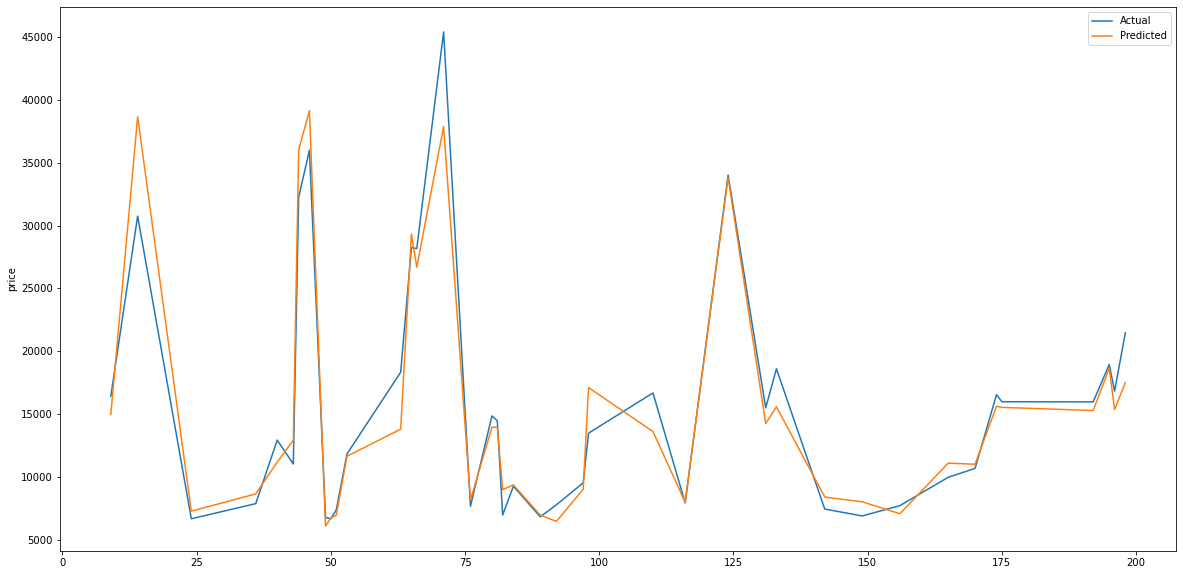

In [116]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGDRegressor

In [117]:
from sklearn.linear_model import SGDRegressor

In [118]:
X_mini = X[['curb-weight','engine-size','highway-mpg']]

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [120]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [121]:
## use same scale for X_train and X_test
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
model = SGDRegressor(random_state=100, max_iter=100)
model.fit(X_train, y_train)
print(f'Train score : {model.score(X_train,y_train)}')
print('No. of iterations = ', model.n_iter_)

Train score : 0.9270594276291244
No. of iterations =  47


In [123]:
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f'Test Score  : {r2score:0.2f}')

Test Score  : 0.93


In [124]:
mse = mean_squared_error(y_test,y_pred)
print("MSE  : ",mse)
print("RMSE : ", np.sqrt(mse))

MSE  :  6142786.368307506
RMSE :  2478.464518266805
